# 1) EXPLORATION OF DATA

In [1]:
#First, we import the csv file using pandas. 
import pandas as pd


In [2]:

ds_salaries = pd.read_csv('ds_salaries.csv')

In [3]:
ds_salaries.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## a) Data Information 

In [4]:
#We want to view all the data information. We can see if columns have the right data type. 
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


## b) Data Numerical Description

In [5]:
ds_salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


## c) Counting the categories 

In [8]:
ds_salaries["experience_level"].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [9]:
ds_salaries["work_year"].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

In [10]:
ds_salaries["job_title"].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [26]:
ds_salaries["company_location"].value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [11]:
ds_salaries["salary_currency"].value_counts()

USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64

# 2) DATA VALIDATION

## a) Updating Data Type 


-- As our data has correct data type. We will not run the syntax. This is the example of syntax if we want to update data type. Imagine that work_year column has float data type which is not accurate. We can change the data type into integer. 

ds_salaries["work_year"] = ds_salaries["work_year"].astype(int)

Then we check again: 
ds_salaries.dtypes

## b) Validate Categorical Data 

To check whether the value in the experience level column are limited to SE, MI, EN, EX only. 

In [13]:
ds_salaries["experience_level"].isin(["SE", "MI", "EN", "EX"])

0       True
1       True
2       True
3       True
4       True
        ... 
3750    True
3751    True
3752    True
3753    True
3754    True
Name: experience_level, Length: 3755, dtype: bool

If there was False and we want to use values only in the list (True), we can use the isin code we just wrote to filter using Boolean indexing. 

In [14]:
ds_salaries[ds_salaries["experience_level"].isin(["SE", "MI", "EN", "EX"])].head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## c) Validate Numerical Data

Select and view only the numerical column in Dataframe. 

In [15]:
ds_salaries.select_dtypes("number").head()

,work_year,salary,salary_in_usd,remote_ratio
0,2023,80000,85847,100
1,2023,30000,30000,100
2,2023,25500,25500,100
3,2023,175000,175000,100
4,2023,120000,120000,100


# 3) DATA SUMMARIZATION

## a) Exploring Group of Data

 - groupby() groups data by category
 - aggregating function such as mean() indicate how to summarize group data. 


In [22]:
ds_salaries.groupby("experience_level").agg(["mean", "min"])

/var/folders/jg/khdd77ms5r94dqnz22kvrxlc0000gn/T/ipykernel_18925/1644864981.py:1: FutureWarning: ['employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ds_salaries.groupby("experience_level").agg(["mean", "min"])


work_year               salary         salary_in_usd  \
                         mean   min           mean    min           mean   
experience_level                                                           
EN                2022.053125  2020  188381.178125   6000   78546.284375   
EX                2022.385965  2020  246802.201754  15000  194930.929825   
MI                2022.203727  2020  248200.306832   7500  104525.939130   
SE                2022.468203  2020  170048.965421   8000  153051.071542   

                        remote_ratio      
                    min         mean min  
experience_level                          
EN                 5409    55.156250   0  
EX                15000    48.245614   0  
MI                 5132    46.211180   0  
SE                 8000    45.071542   0

In [23]:
ds_salaries.groupby("experience_level").mean()

/var/folders/jg/khdd77ms5r94dqnz22kvrxlc0000gn/T/ipykernel_18925/2491047737.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ds_salaries.groupby("experience_level").mean()


,work_year,salary,salary_in_usd,remote_ratio
experience_level,,,,
EN,2022.053125,188381.178125,78546.284375,55.156250
EX,2022.385965,246802.201754,194930.929825,48.245614
MI,2022.203727,248200.306832,104525.939130,46.211180
SE,2022.468203,170048.965421,153051.071542,45.071542


## b) Aggregate functions across Dataframe for Ungrouped Data

In [20]:
ds_salaries.agg(["mean", "std"])

/var/folders/jg/khdd77ms5r94dqnz22kvrxlc0000gn/T/ipykernel_18925/3446506780.py:1: FutureWarning: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  ds_salaries.agg(["mean", "std"])


,work_year,salary,salary_in_usd,remote_ratio
mean,2022.373635,190695.571771,137570.389880,46.271638
std,0.691448,671676.500508,63055.625278,48.589050


In [25]:
ds_salaries.groupby("experience_level").agg( Average_salary_usd = ("salary_in_usd","mean"), Median_work_year = ("work_year", "median"))

,Average_salary_usd,Median_work_year
experience_level,,
EN,78546.284375,2022.0
EX,194930.929825,2023.0
MI,104525.939130,2022.0
SE,153051.071542,2023.0


# 4) ADDRESSING MISSING DATA

## a) Checking for missing values

In [35]:
ds_salaries.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# 5) CONVERTING AND ANALYZING CATEGORICAL DATA

## a) Previewing The Data

In [36]:
ds_salaries.select_dtypes("object").head()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,SE,FT,Principal Data Scientist,EUR,ES,GB,L
1,MI,CT,ML Engineer,USD,US,GB,S
2,MI,CT,ML Engineer,USD,US,GB,S
3,SE,FT,Data Scientist,USD,CA,GB,M
4,SE,FT,Data Scientist,USD,CA,GB,M


To see how many unique job title in the dataframe. There are 93 unique job title.

In [38]:
ds_salaries["job_title"].nunique()

93

## b) Finding Multiple Phrases in Strings

There are too many unique job title. We want to categorize them by using our own list of job category. This will become the values of a new column in our DataFrame. 

In [41]:
import numpy as np

 -- CREATE LIST FIRST --

In [39]:
job_categories = ["Data Science", "Data Analytics", "Data Engineering", "Machine Learning","Managerial","Consultant"]

-- CREATE STRING --

In [46]:
data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant = "Consultant|Freelance"

-- CREATE CONDITION --

In [47]:
conditions = [(ds_salaries["job_title"].str.contains(data_science)),
             (ds_salaries["job_title"].str.contains(data_analyst)),
             (ds_salaries["job_title"].str.contains(data_engineer)),
             (ds_salaries["job_title"].str.contains(ml_engineer)),
             (ds_salaries["job_title"].str.contains(manager)),
             (ds_salaries["job_title"].str.contains(consultant))]

-- APPLY CONDITION --

In [48]:
ds_salaries["Job_Category"] = np.select(conditions, job_categories, default = "Other")


In [49]:
ds_salaries[["job_title", "Job_Category"]].head()

,job_title,Job_Category
0,Principal Data Scientist,Data Science
1,ML Engineer,Machine Learning
2,ML Engineer,Machine Learning
3,Data Scientist,Data Science
4,Data Scientist,Data Science


Visualize job category frequency

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt 

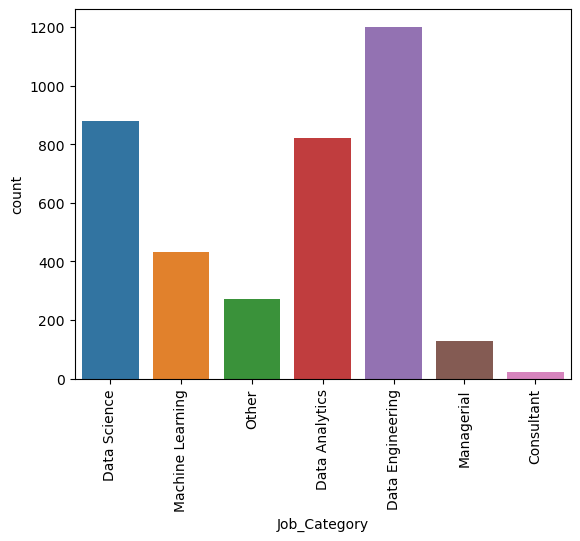

In [55]:
sns.countplot(data = ds_salaries, x = "Job_Category")
plt.xticks(rotation = 90)
plt.show()

# 6) WORKING WITH NUMERIC DATA

## a) Adding Summary Statistics Into a Dataframe

We want to create a new column containing the standard deviation (summary statistic), where values are conditional based on the Experience column.

In [116]:
ds_salaries["std_dev"] = ds_salaries.groupby("experience_level")["salary_in_usd"].transform(lambda x: x.std())
ds_salaries["std_dev"].head()

0    56896.263954
1    54387.685128
2    54387.685128
3    56896.263954
4    56896.263954
Name: std_dev, dtype: float64

In [115]:
ds_salaries[["experience_level", "std_dev"]].value_counts()

experience_level  std_dev     
SE                56896.263954    2516
MI                54387.685128     805
EN                52225.424309     320
EX                70661.929661     114
dtype: int64

# 7) HANDLING OUTLIERS

## a) Using the Interquartile Range 

- identify if our dataset has outliers in salary column

In [129]:
#We can see the max salary is about 4 times the mean & median. 
#So, there must be extreme values. 
ds_salaries["salary_in_usd"].describe()

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

 - We need to know the interquartile range (IQR) which is the difference between 75th and 25th percentile. 

IQR = 75th - 25th percentile

Upper Outliers > 75th percentile + (1.5* IQR)
Lower Outliers < 25th percentile - (1.5 * IQR)



- Identifying IQR

In [122]:
#75th percentile:
seventy_fifth = ds_salaries["salary_in_usd"].quantile(0.75)

#25th percentile:
twenty_fifth = ds_salaries["salary_in_usd"].quantile(0.25)

#IQR
salaries_iqr = seventy_fifth - twenty_fifth

salaries_iqr

80000.0

- identify outliers

In [123]:
#upper threshold
upper = seventy_fifth + (1.5 * salaries_iqr)

#lower threshold
lower = twenty_fifth - (1.5 * salaries_iqr)

print(upper, lower)

295000.0 -25000.0


In [124]:
#subset data to find value outside of these limits. We want to see only experience, employee residence and salary. 
ds_salaries[(ds_salaries["salary_in_usd"] < lower)| (ds_salaries["salary_in_usd"]> upper)]\
           [["experience_level", "employee_residence", "salary_in_usd"]]

,experience_level,employee_residence,salary_in_usd
33,SE,US,342810
68,SE,US,309400
83,EN,IN,300000
133,SE,US,342300
145,SE,US,318300
...,...,...,...
3522,MI,US,450000
3675,EX,US,416000
3697,EX,US,325000
3747,MI,US,423000


Why look for outliers? 
1 - outliers are extreme values. May not accurately represent our data. 
2 - Can change the mean and standard deviation. 
3 - Statistical test and machine learning models need normally distributed data. 

## b) Dropping Outliers 

In [127]:
no_outliers = ds_salaries[(ds_salaries["salary_in_usd"] > lower) & (ds_salaries["salary_in_usd"] < upper)]
no_outliers.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Job_Category,std_dev
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,GB,L,Data Science,56896.263954
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,GB,S,Machine Learning,54387.685128
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,GB,S,Machine Learning,54387.685128
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,GB,M,Data Science,56896.263954
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,GB,M,Data Science,56896.263954


In [126]:
no_outliers["salary_in_usd"].describe()

count      3692.000000
mean     134262.993770
std       57992.294349
min        5132.000000
25%       94916.250000
50%      133916.000000
75%      174500.000000
max      293000.000000
Name: salary_in_usd, dtype: float64

## c) Plot the histogram to see before and after removing the outliers. 

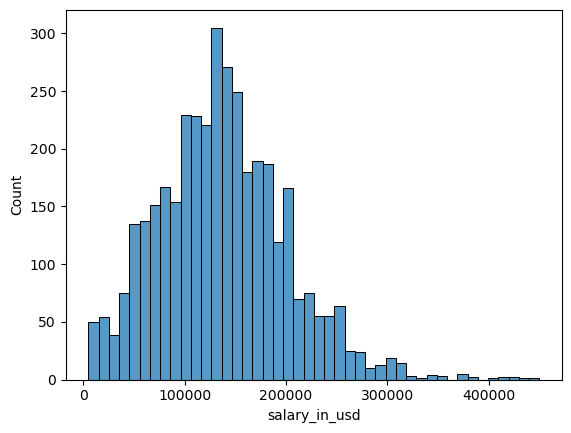

In [130]:
#Before remove the outliers. The distribution is right-skewed by the upper outliers.  
sns.histplot(data=ds_salaries, x="salary_in_usd")
plt.show()

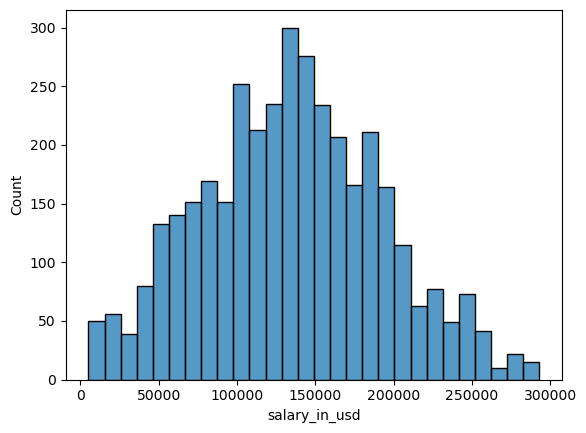

In [131]:
#After remove the outliers. The distribution is normally distributed. 
sns.histplot(data=no_outliers, x="salary_in_usd")
plt.show()

# 7) CONSIDERATION FOR CATEGORICAL DATA

We need to consider the representation of our data. Why? Is our sample representative of the population?:

- To understand data distribution
- Identifying patterns and relationships
- Categorical data play a significant role in predicitve modelling or statistical analysis. Exploring the relationship between categorical features and the target variable can help determine their importance and relevance in the analysis. 
- To visualize and communicate patterns, distributions or comaprisons. 

## a) Relative Class Frequency

In [210]:
#First we see the relative frequency of our 
#categorical data. Also known as a proportion or 
#relative proportion. It is a statistical measure that 
#represent proportion of a particular value relative to 
#the total number of observations. 

no_outliers["Job_Category"].value_counts(normalize=True)


Data Engineering    0.320423
Data Science        0.234561
Data Analytics      0.221560
Machine Learning    0.114030
Other               0.071235
Managerial          0.031690
Consultant          0.006501
Name: Job_Category, dtype: float64

## b) Cross Tabulation

- We use cross tabulation to analyze the relationship between two categorical variables. 

In [213]:
pd.crosstab(no_outliers["Job_Category"], no_outliers["company_size"], values = no_outliers["salary_in_usd"], aggfunc = "mean")

company_size,L,M,S
Job_Category,,,
Consultant,67745.250000,92983.941176,78858.000000
Data Analytics,75638.294872,116816.054775,61572.464286
Data Engineering,118039.320000,143665.358349,85944.764706
Data Science,106560.405172,146494.396648,61605.088235
Machine Learning,121710.985075,156772.553398,87709.311111
Managerial,144463.045455,160854.637363,118630.000000
Other,139730.581818,152667.723958,76492.062500


- From the above cross tab result. We can see that the average salary(USD) for consultant in large company is $67,745. 

In [217]:
ds_salaries_clean = no_outliers

In [218]:
ds_salaries_clean.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Job_Category,std_dev
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,GB,L,Data Science,56896.263954
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,GB,S,Machine Learning,54387.685128
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,GB,S,Machine Learning,54387.685128
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,GB,M,Data Science,56896.263954
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,GB,M,Data Science,56896.263954


In [220]:
ds_salaries_clean.to_csv('/Users/nuratiqamohdfouzy/Downloads/ds_salaries_clean.csv', index=False)
